In [1]:
#Important imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, learning_curve
from statistics import mean
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


## DataSet Information
 *The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. The original content be publicly accessed and retrieved using the provided urls.
 


*Acquisition date: January 8, 2015

*The estimated relative performance values were estimated by the authors using a Random Forest classifier and a rolling windows as assessment method. See their article for more details on how the relative performance values were set.

## Attribute Information
<Li> url: URL of the article (non-predictive)
<Li> timedelta: Days between the article publication and the dataset acquisition (non-predictive)
<Li> n_tokens_title: Number of words in the title
<Li> n_tokens_content: Number of words in the content
<Li> n_unique_tokens: Rate of unique words in the content
<Li> n_non_stop_words: Rate of non-stop words in the content
<Li> n_non_stop_unique_tokens: Rate of unique non-stop words in the content
<Li> num_hrefs: Number of links
<Li> num_self_hrefs: Number of links to other articles published by Mashable
<Li> num_imgs: Number of images
<Li> num_videos: Number of videos
<Li> average_token_length: Average length of the words in the content
<Li> num_keywords: Number of keywords in the metadata
<Li> data_channel_is_lifestyle: Is data channel 'Lifestyle'?
<Li> data_channel_is_entertainment: Is data channel 'Entertainment'?
<Li> data_channel_is_bus: Is data channel 'Business'?
<Li> data_channel_is_socmed: Is data channel 'Social Media'?
<Li> data_channel_is_tech: Is data channel 'Tech'?
<Li> data_channel_is_world: Is data channel 'World'?
<Li> kw_min_min: Worst keyword (min. shares)
<Li> kw_max_min: Worst keyword (max. shares)
<Li> kw_avg_min: Worst keyword (avg. shares)
<Li> kw_min_max: Best keyword (min. shares)
<Li> kw_max_max: Best keyword (max. shares)
<Li> kw_avg_max: Best keyword (avg. shares)
<Li> kw_min_avg: Avg. keyword (min. shares)
<Li> kw_max_avg: Avg. keyword (max. shares)
<Li> kw_avg_avg: Avg. keyword (avg. shares)
<Li> self_reference_min_shares: Min. shares of referenced articles in Mashable
<Li> self_reference_max_shares: Max. shares of referenced articles in Mashable
<Li> self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
<Li> weekday_is_monday: Was the article published on a Monday?
<Li> weekday_is_tuesday: Was the article published on a Tuesday?
<Li> weekday_is_wednesday: Was the article published on a Wednesday?
<Li> weekday_is_thursday: Was the article published on a Thursday?
<Li> weekday_is_friday: Was the article published on a Friday?
<Li> weekday_is_saturday: Was the article published on a Saturday?
<Li> weekday_is_sunday: Was the article published on a Sunday?
<Li> is_weekend: Was the article published on the weekend?
<Li> LDA_00: Closeness to LDA topic 0
<Li> LDA_01: Closeness to LDA topic 1
<Li> LDA_02: Closeness to LDA topic 2
<Li> LDA_03: Closeness to LDA topic 3
<Li> LDA_04: Closeness to LDA topic 4
<Li> global_subjectivity: Text subjectivity
<Li> global_sentiment_polarity: Text sentiment polarity
<Li> global_rate_positive_words: Rate of positive words in the content
<Li> global_rate_negative_words: Rate of negative words in the content
<Li> rate_positive_words: Rate of positive words among non-neutral tokens
<Li> rate_negative_words: Rate of negative words among non-neutral tokens
<Li> avg_positive_polarity: Avg. polarity of positive words
<Li> min_positive_polarity: Min. polarity of positive words
<Li> max_positive_polarity: Max. polarity of positive words
<Li> avg_negative_polarity: Avg. polarity of negative words
<Li> min_negative_polarity: Min. polarity of negative words
<Li> max_negative_polarity: Max. polarity of negative words
<Li> title_subjectivity: Title subjectivity
<Li> title_sentiment_polarity: Title polarity
<Li> abs_title_subjectivity: Absolute subjectivity level
<Li> abs_title_sentiment_polarity: Absolute polarity level
<Li> shares: Number of shares (target)

## The Dropped Columns
<Li>url 
<Li>timedelta
<Li>n_non_stop_words
<Li>n_non_stop_unique_tokens
<Li>num_self_hrefs
<Li>kw_min_min
<Li>kw_max_min
<Li>kw_min_max
<Li>kw_max_max
<Li>kw_min_avg
<Li>kw_max_avg
<Li>self_reference_min_shares
<Li>self_reference_max_shares
<Li>self_reference_avg_sharess
<Li>rate_positive_words
<Li>rate_negative_words


These columns were dropped as they will not be of any use for us

In [2]:
#Reading dataframe
newsDF=pd.read_csv('D:\Education\Year 3 Semester 1\Machine learning\Project\OnlineNewsPopularity\OnlineNewsPopularity.csv')

In [3]:
#to replace the space in the beginning of each attribute that had one with a underscore
newsDF.columns = [c.replace(' ', '_') for c in newsDF.columns]

In [4]:
newsDF

,url,_timedelta,_n_tokens_title,_n_tokens_content,_n_unique_tokens,_n_non_stop_words,_n_non_stop_unique_tokens,_num_hrefs,_num_self_hrefs,_num_imgs,...,_min_positive_polarity,_max_positive_polarity,_avg_negative_polarity,_min_negative_polarity,_max_negative_polarity,_title_subjectivity,_title_sentiment_polarity,_abs_title_subjectivity,_abs_title_sentiment_polarity,_shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [5]:
newsDF.shape

(39644, 61)

In [6]:
#checking for nulls 
newsDF.isna().sum()

url                              0
_timedelta                       0
_n_tokens_title                  0
_n_tokens_content                0
_n_unique_tokens                 0
                                ..
_title_subjectivity              0
_title_sentiment_polarity        0
_abs_title_subjectivity          0
_abs_title_sentiment_polarity    0
_shares                          0
Length: 61, dtype: int64

In [7]:
newsDF.dropna(inplace=True)

In [8]:
newsDF.shape

(39644, 61)

In [9]:
#dropping unnecessary columns
newsDF=newsDF.drop(['url','_timedelta','_n_non_stop_words','_n_non_stop_unique_tokens','_num_self_hrefs','_kw_min_min','_kw_max_min','_kw_min_max','_kw_max_max','_kw_min_avg','_kw_max_avg','_self_reference_min_shares','_self_reference_max_shares','_self_reference_avg_sharess','_rate_positive_words','_rate_negative_words'],axis=1)

In [10]:
newsDF.shape

(39644, 45)

In [11]:
newsDF

,_n_tokens_title,_n_tokens_content,_n_unique_tokens,_num_hrefs,_num_imgs,_num_videos,_average_token_length,_num_keywords,_data_channel_is_lifestyle,_data_channel_is_entertainment,...,_min_positive_polarity,_max_positive_polarity,_avg_negative_polarity,_min_negative_polarity,_max_negative_polarity,_title_subjectivity,_title_sentiment_polarity,_abs_title_subjectivity,_abs_title_sentiment_polarity,_shares
0,12.0,219.0,0.663594,4.0,1.0,0.0,4.680365,5.0,0.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,3.0,1.0,0.0,4.913725,4.0,0.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,3.0,1.0,0.0,4.393365,6.0,0.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,9.0,1.0,0.0,4.404896,7.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,9.0,1.0,1.0,4.523121,8.0,0.0,0.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12.0,328.0,0.696296,9.0,3.0,48.0,4.405488,7.0,0.0,0.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10.0,442.0,0.516355,24.0,12.0,1.0,5.076923,8.0,0.0,0.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6.0,682.0,0.539493,10.0,1.0,0.0,4.975073,5.0,0.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [12]:
#checking for duplicates
newsDF.duplicated().sum()

0

## Checking For Outliers 


In [13]:
# Using IQR Method
Q1 = newsDF.quantile(0.25)
Q3 = newsDF.quantile(0.75)
IQR = Q3 - Q1

In [14]:
print(IQR)

_n_tokens_title                        3.000000
_n_tokens_content                    470.000000
_n_unique_tokens                       0.137825
_num_hrefs                            10.000000
_num_imgs                              3.000000
_num_videos                            1.000000
_average_token_length                  0.376435
_num_keywords                          3.000000
_data_channel_is_lifestyle             0.000000
_data_channel_is_entertainment         0.000000
_data_channel_is_bus                   0.000000
_data_channel_is_socmed                0.000000
_data_channel_is_tech                  0.000000
_data_channel_is_world                 0.000000
_kw_avg_min                          215.250000
_kw_avg_max                       158133.125000
_kw_avg_avg                         1217.780999
_weekday_is_monday                     0.000000
_weekday_is_tuesday                    0.000000
_weekday_is_wednesday                  0.000000
_weekday_is_thursday                   0

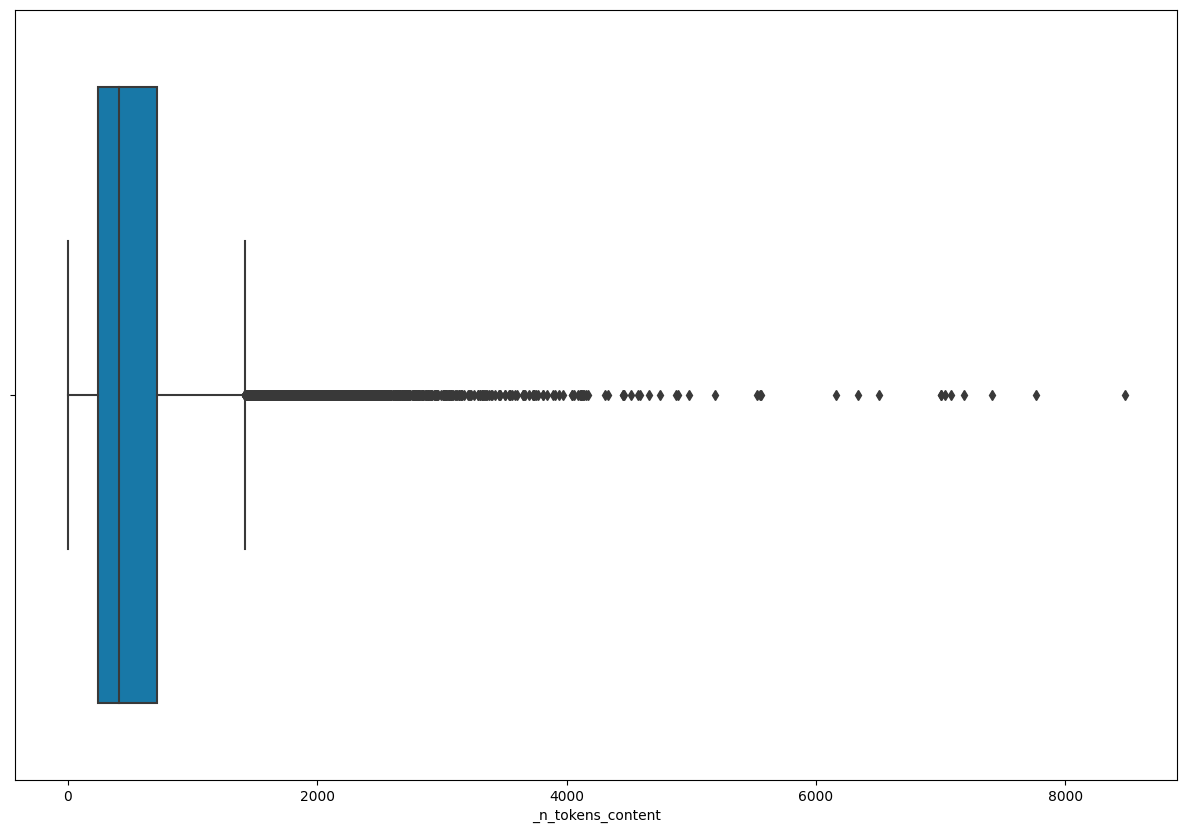

In [15]:
#Using BoxPlot
plt.figure(figsize=(15,10)) 
sns.boxplot(x= "_n_tokens_content",data = newsDF, palette='winter')
plt.show()

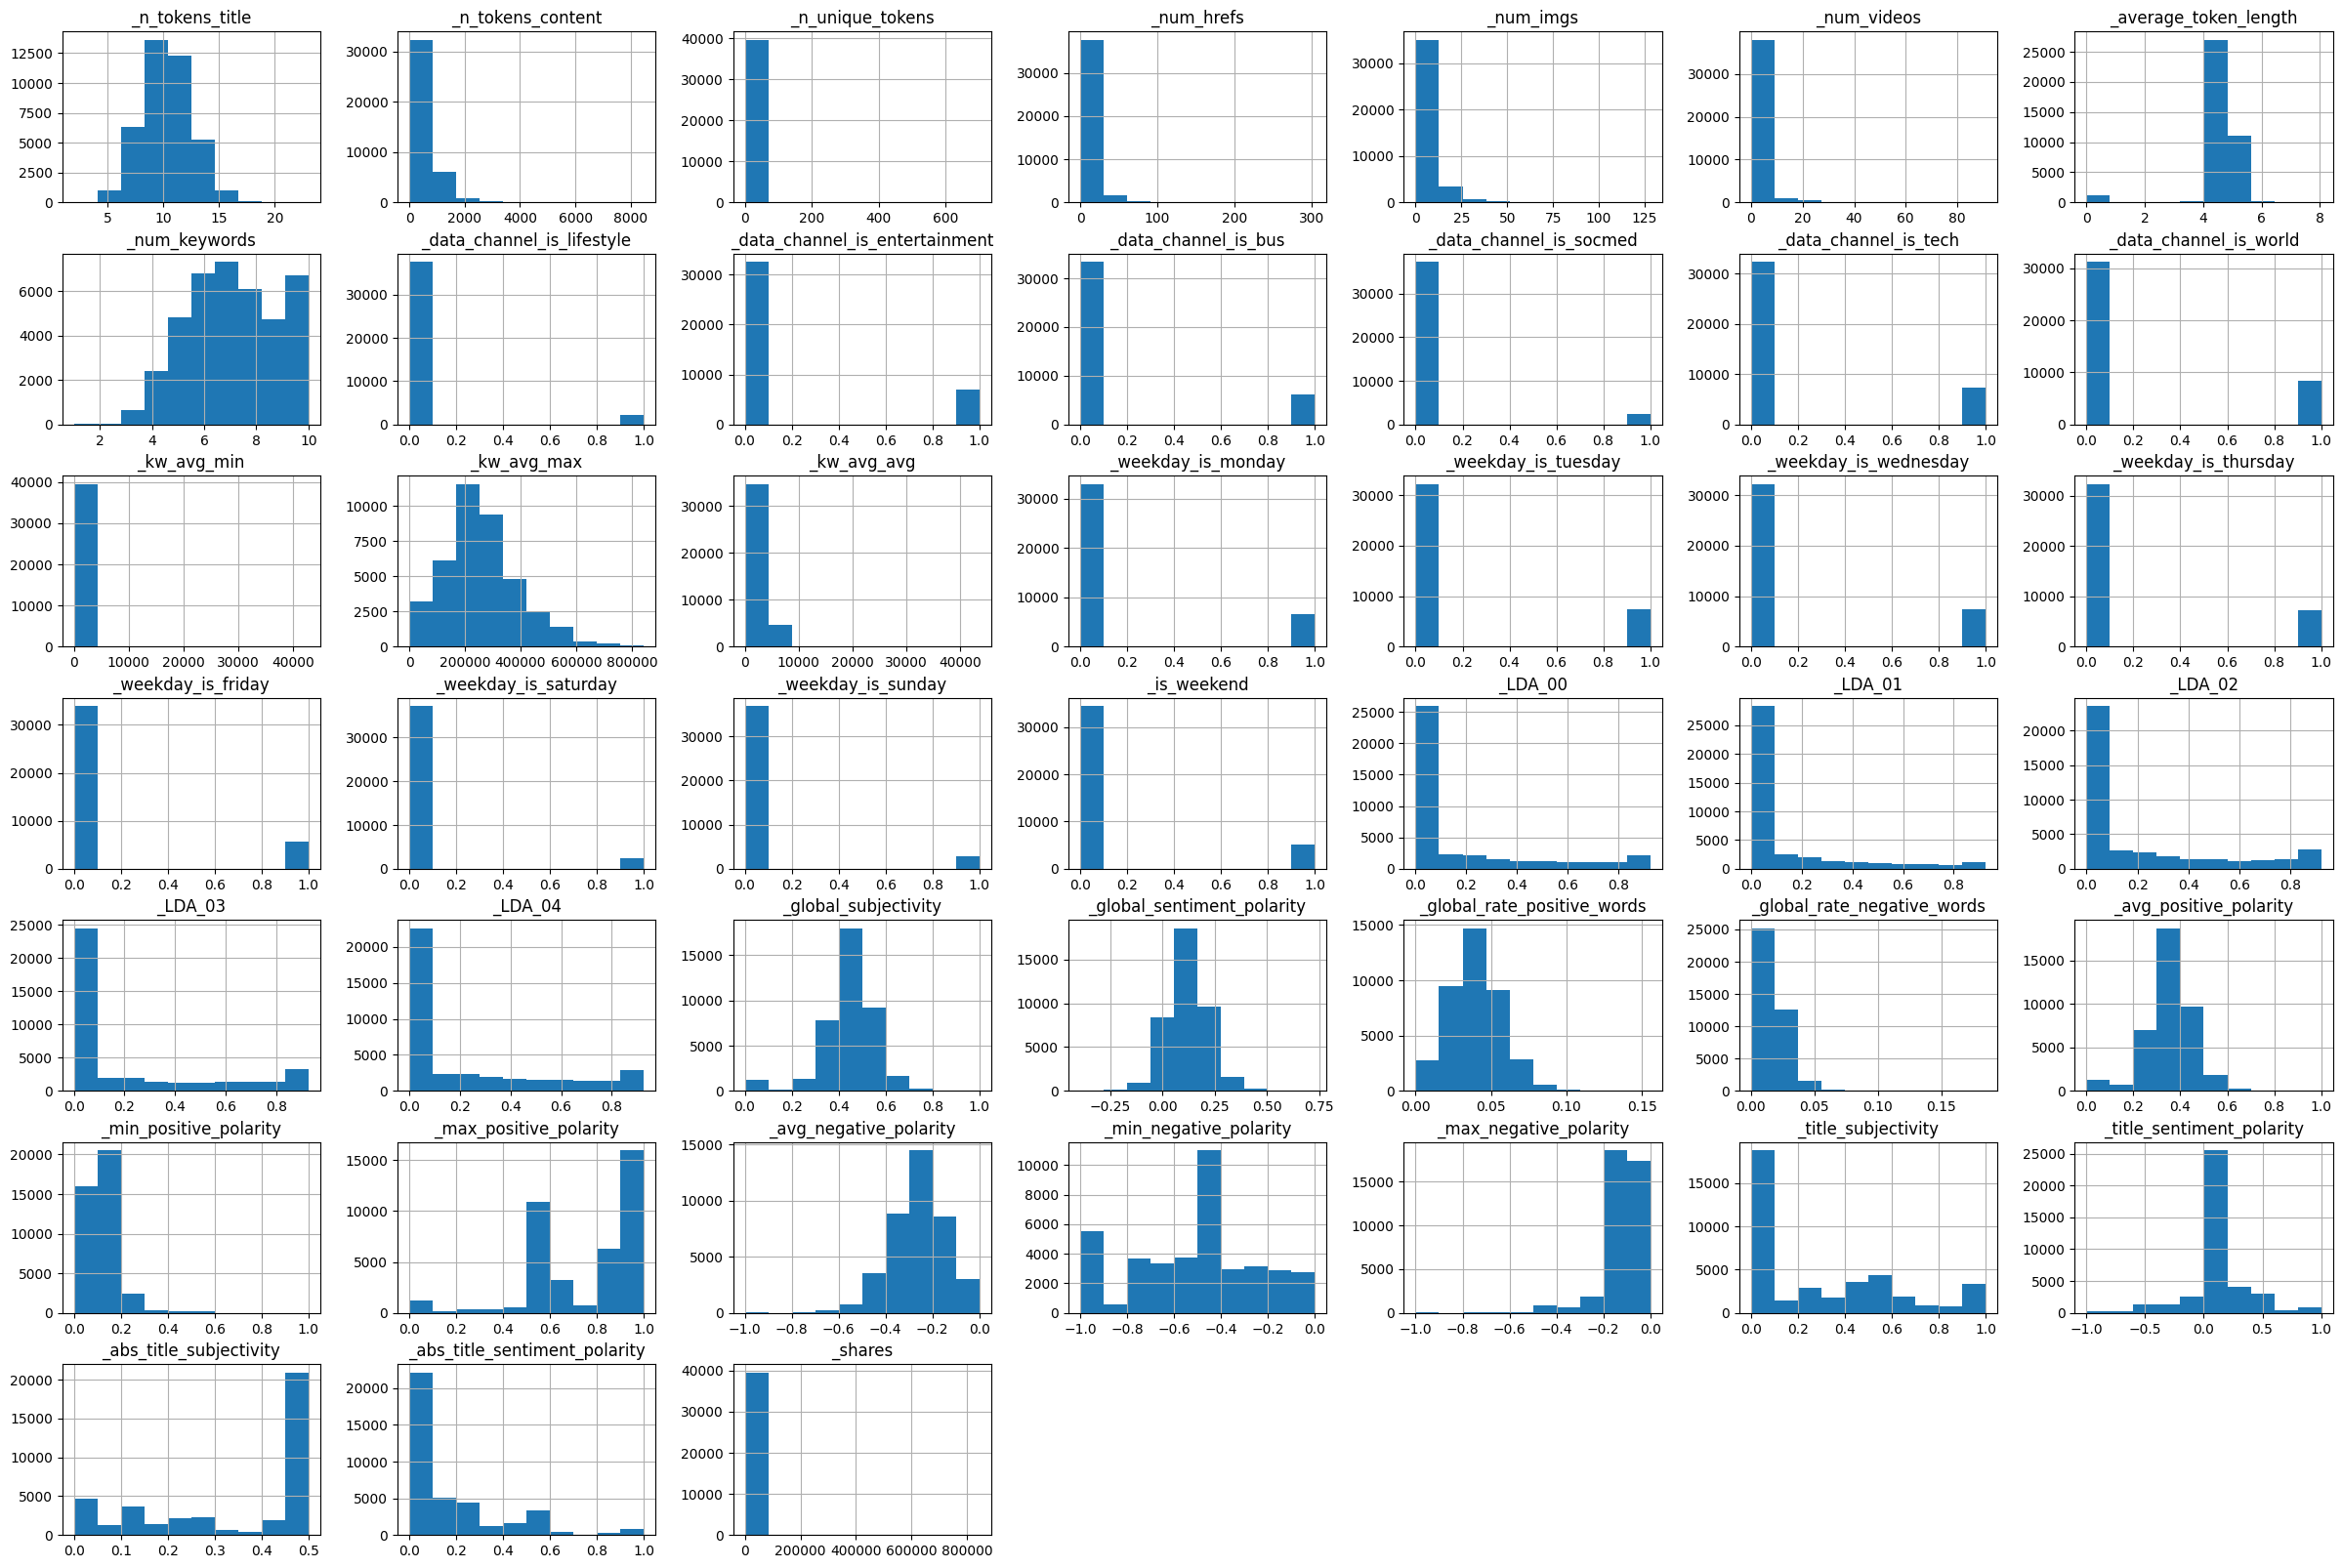

In [16]:
newsDF.hist(figsize=(30,20))
plt.show()

In [17]:
X_df = pd.DataFrame(newsDF._n_tokens_content)
y_df = pd.DataFrame(newsDF._shares)

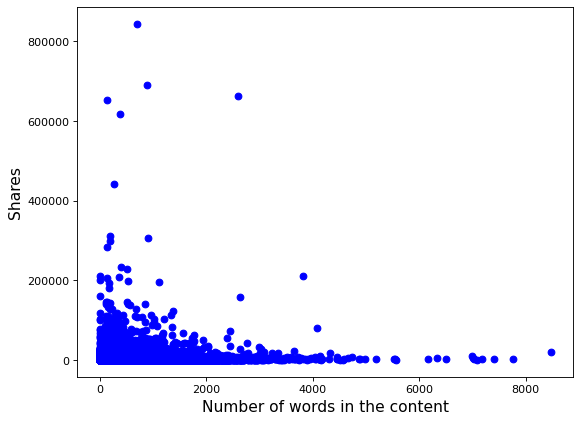

In [18]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(X_df, y_df,c="blue")    
plt.xlabel('Number of words in the content',fontsize=14)
plt.ylabel('Shares',fontsize=14)
plt.show()

from the previous plot we can tell that whenvever the words count increases the amount of shares decreases

## Supervised Learning Algorithms For Classification

these models will be used
1-K-Nearest Neighbor
2-Multiclass Classification
3-Logestic Regression

### Spliting the dataset

In [19]:
mean = newsDF['_shares'].mean()

In [20]:
#Converting output columns to 0 and 1
newsDF['_shares'] = newsDF['_shares'].apply(lambda x: 0 if x <mean  else 1)

In [21]:
#making x equal to our target which is the shares
x=newsDF.drop(['_shares'],axis=1)
y=newsDF['_shares']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4, random_state=42)

In [23]:
#KNN Algorithim
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

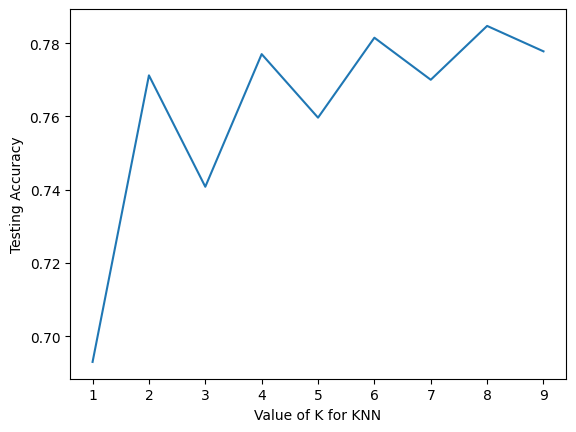

In [24]:
#plot to figure out the best accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

the best accuracy is when K is equal to 8

In [25]:

knn = KNeighborsClassifier(n_neighbors=8, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [26]:
#printing the accuracy on training set and test set
print("Accuracy on training set: {:.3f}".format(knn.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(x_test, y_test)))

Accuracy on training set: 0.807
Accuracy on test set: 0.785


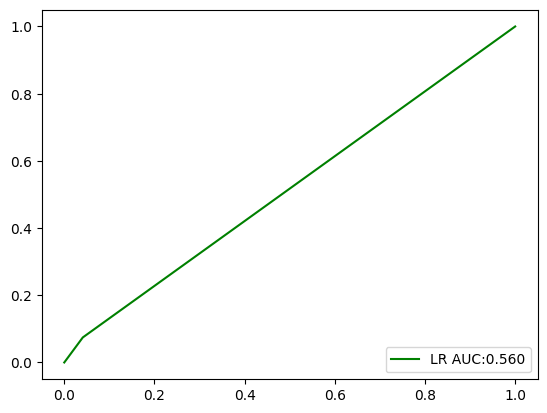

In [27]:
#Evaluation using auc score and roc curve
auc = roc_auc_score(y_pred, y_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

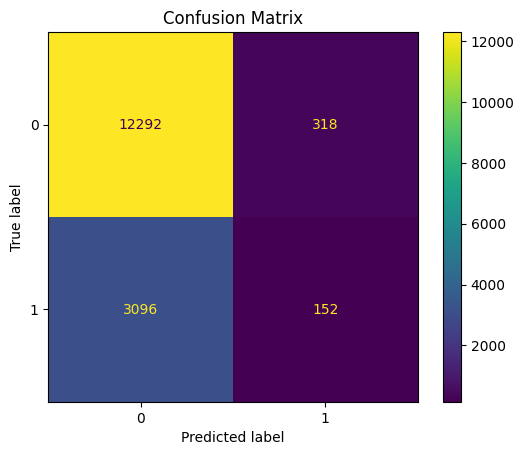

In [28]:
#Evaluation using Confusion Matrix 
plot_confusion_matrix(knn, x_test, y_test)  
plt.title('Confusion Matrix')
plt.show()

In [29]:
train_sizes, train_scores, test_scores =\
learning_curve(knn, x, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

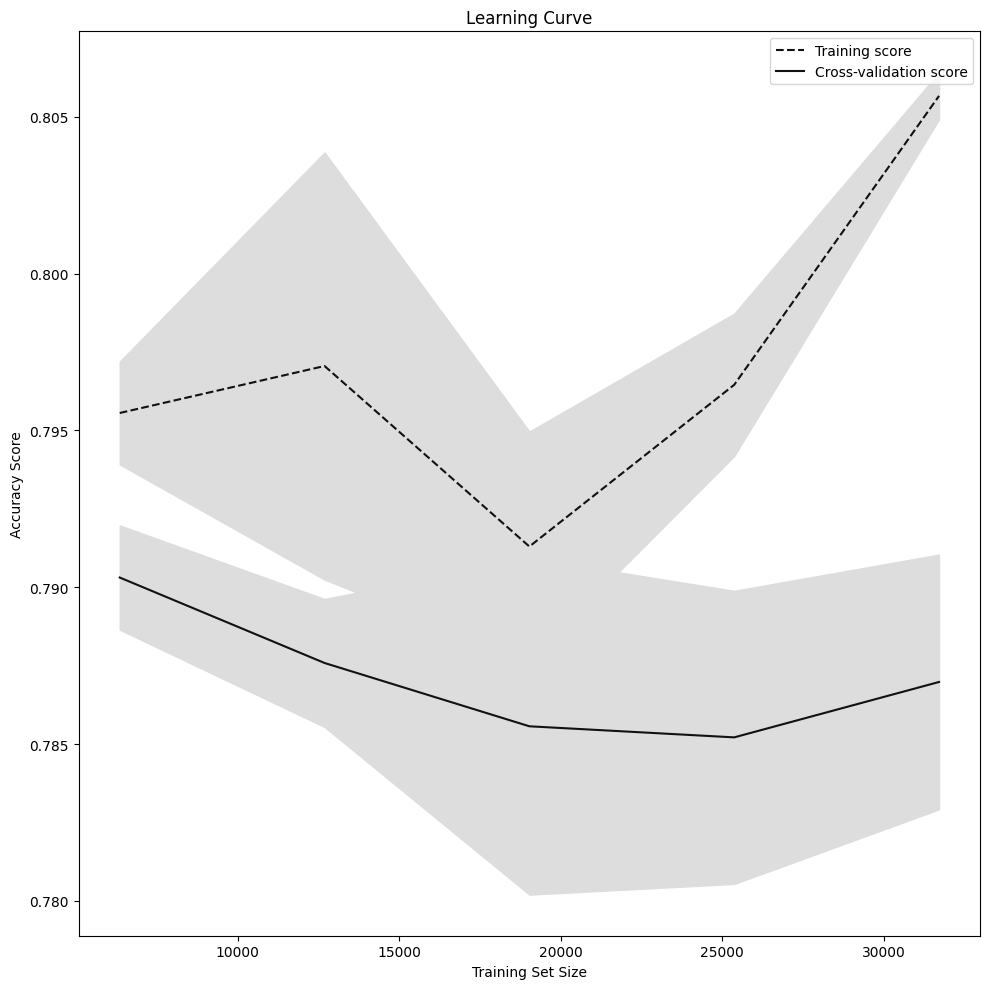

In [30]:
#ploting the learning curve which shows the accuracy
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

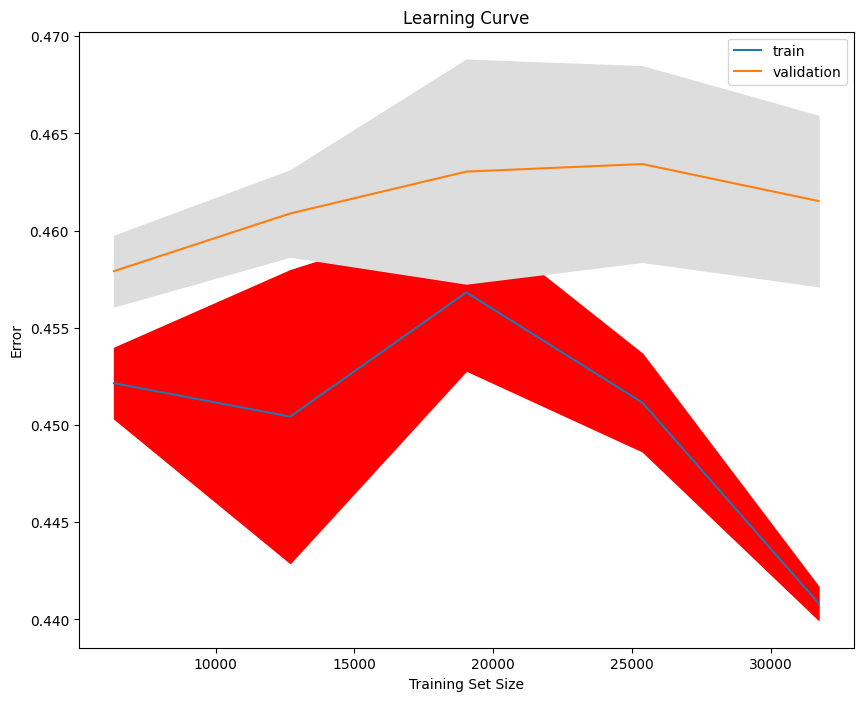

In [31]:
#ploting the learning curve which shows the error
train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn,
    X=x,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],

)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4, random_state=42)

In [33]:
#Multiclass Classification
#checking which depth has the best accuracy
from sklearn.tree import DecisionTreeClassifier
for i in range(1,8):
    treecf = DecisionTreeClassifier(max_depth=i,random_state=0)
    treecf.fit(x_train, y_train)
    y1_pred = treecf.predict(x_test)
    acc_train = treecf.score(x_train, y_train)
    acc_test = treecf.score(x_test, y_test)
    print("max_depth:{}".format(i))
    print("Training accuracy:{:.3f}".format(acc_train),"\nTesting accuracy:{}".format(acc_test))
    print(".....................")

max_depth:1
Training accuracy:0.797 
Testing accuracy:0.7951822424013116
.....................
max_depth:2
Training accuracy:0.797 
Testing accuracy:0.7951822424013116
.....................
max_depth:3
Training accuracy:0.797 
Testing accuracy:0.7958758986000757
.....................
max_depth:4
Training accuracy:0.798 
Testing accuracy:0.7958128389456426
.....................
max_depth:5
Training accuracy:0.799 
Testing accuracy:0.7945516458569807
.....................
max_depth:6
Training accuracy:0.803 
Testing accuracy:0.7917770210619246
.....................
max_depth:7
Training accuracy:0.808 
Testing accuracy:0.7910203052087275
.....................


According to the previous cell our accuracy is the highest when the max depth is set to 3

In [34]:
newstreecf = DecisionTreeClassifier(max_depth=3,random_state=0)
newstreecf.fit(x_train, y_train)
y1_pred = newstreecf.predict(x_test)

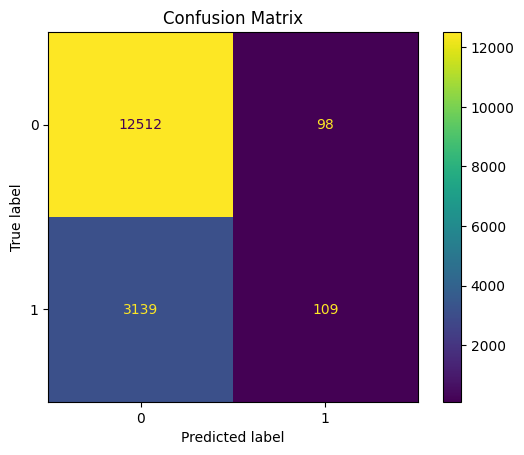

In [35]:
#Evaluation using Confusion Matrix 
plot_confusion_matrix(newstreecf, x_test, y_test)  
plt.title('Confusion Matrix')
plt.show()

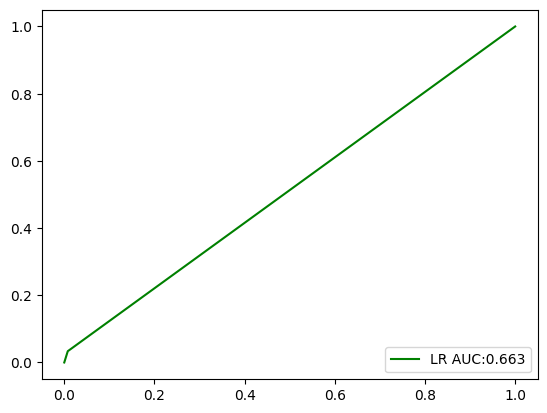

In [36]:
#Evaluation using auc score and roc curve
auc = roc_auc_score(y1_pred, y_test)

fpr, tpr, thresholds = roc_curve(y_test, y1_pred)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

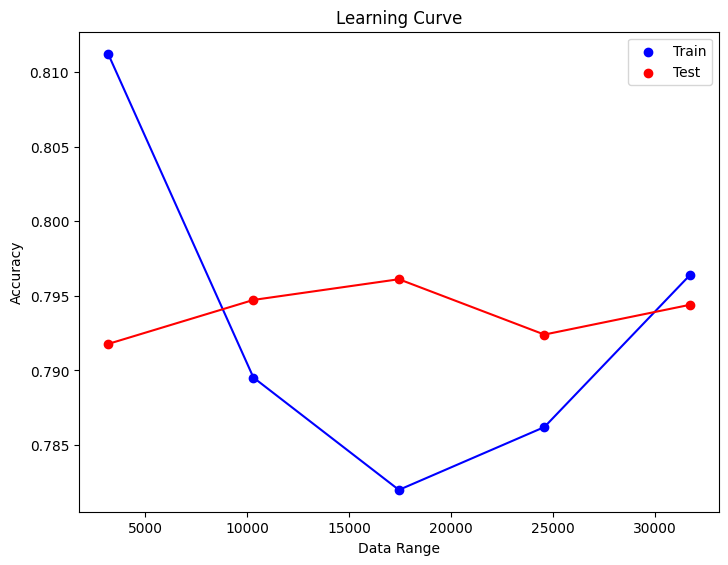

In [37]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(newstreecf, x, y,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(['Train','Test'],loc="best")
plt.show()

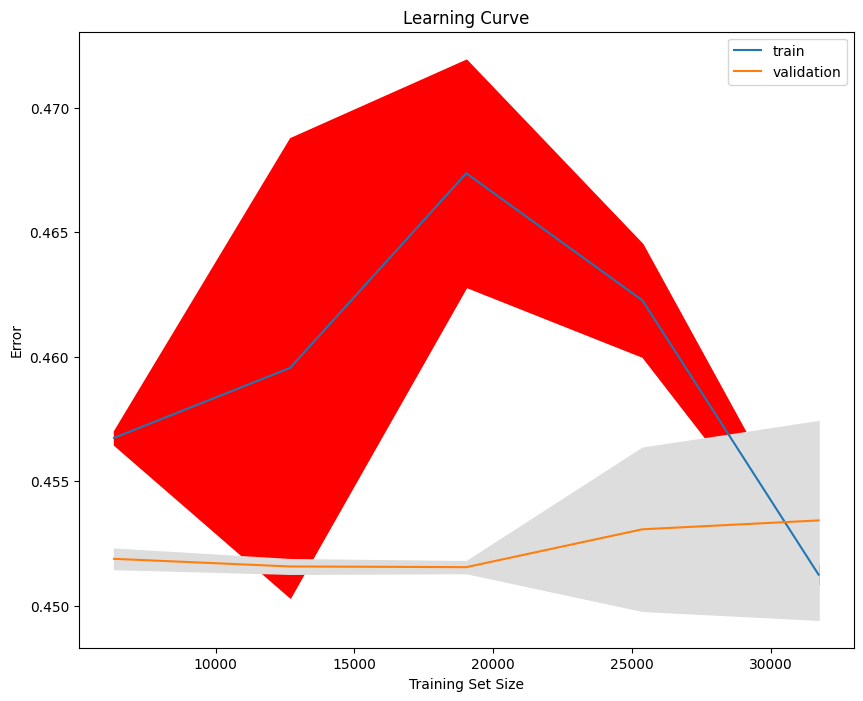

In [38]:
#ploting the learning curve which shows the error
train_sizes, train_scores, test_scores = learning_curve(
    estimator=newstreecf,
    X=x,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],

)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4, random_state=42)

[0.795434481019044, 0.7949930634380123, 0.7951822424013116, 0.7951822424013116, 0.7951822424013116]


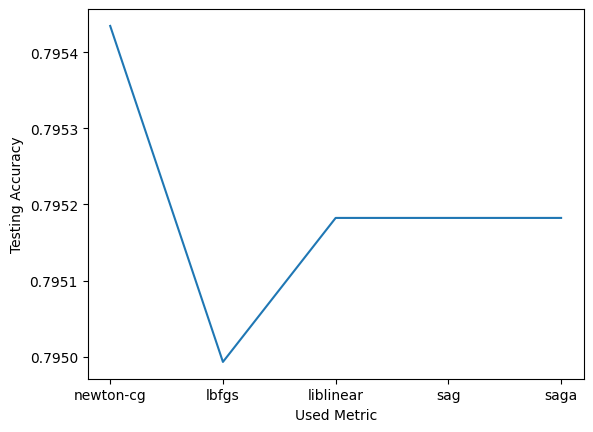

In [40]:
#Using Logestic Regression
#checking which solver has the best accuracy
Sols = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scores = []
for s in Sols:
    l = LogisticRegression(random_state=42,solver=s, max_iter=10000).fit(x_train, y_train)
    y_pred = l.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
  
print(scores)
plt.plot(Sols, scores)
plt.xlabel('Used Metric')
plt.ylabel('Testing Accuracy')
plt.show()


newton-cg solver is the highest in the accuracy

In [41]:
lr = LogisticRegression(random_state=42,solver='newton-cg', max_iter=10000).fit(x_train, y_train)
lr.score(x_test, y_test)

0.795434481019044

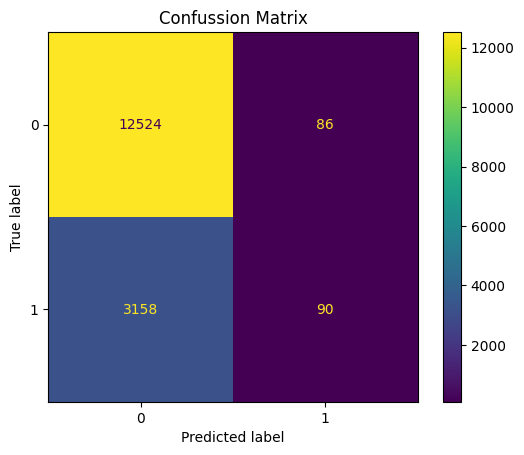

In [42]:
plot_confusion_matrix(lr, x_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

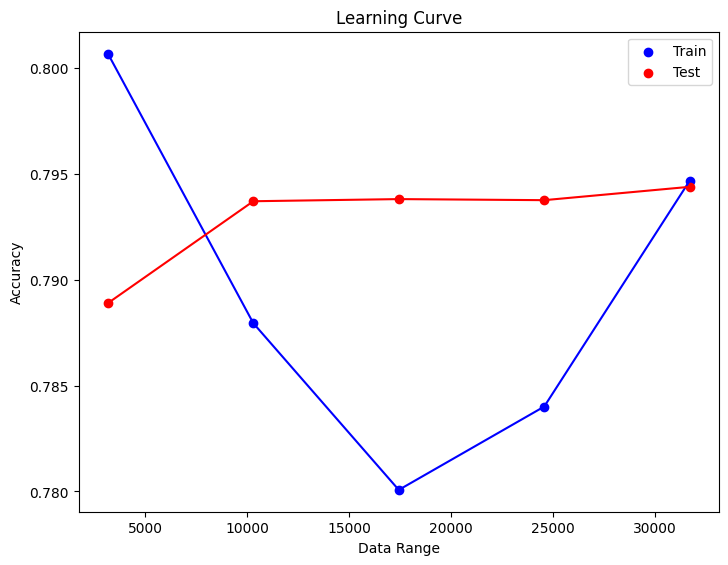

In [43]:
# ploting the learning curve
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(lr, x, y,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(['Train','Test'],loc="best")
plt.show()

## the feature selection method is going to be Variance Based Thresholding

In [44]:
#getting the variance of every column
X = newsDF.iloc[:,0:-1]
y = newsDF["_shares"]
newsDF.var()

_n_tokens_title                   4.469152e+00
_n_tokens_content                 2.219423e+05
_n_unique_tokens                  1.239539e+01
_num_hrefs                        1.284146e+02
_num_imgs                         6.904669e+01
_num_videos                       1.687447e+01
_average_token_length             7.130208e-01
_num_keywords                     3.644779e+00
_data_channel_is_lifestyle        5.014418e-02
_data_channel_is_entertainment    1.463257e-01
_data_channel_is_bus              1.329401e-01
_data_channel_is_socmed           5.516435e-02
_data_channel_is_tech             1.509672e-01
_data_channel_is_world            1.673864e-01
_kw_avg_min                       3.853726e+05
_kw_avg_max                       1.825262e+10
_kw_avg_avg                       1.737520e+06
_weekday_is_monday                1.397931e-01
_weekday_is_tuesday               1.516645e-01
_weekday_is_wednesday             1.523752e-01
_weekday_is_thursday              1.497090e-01
_weekday_is_f

In [45]:
#checking if the variance of the columns is less than or bigger than the threshold
vt = VarianceThreshold(threshold=800)
vt.fit(X)
pd.DataFrame({'variance': vt.variances_,
              'select_feature': vt.get_support()},
            index=X.columns).T

,_n_tokens_title,_n_tokens_content,_n_unique_tokens,_num_hrefs,_num_imgs,_num_videos,_average_token_length,_num_keywords,_data_channel_is_lifestyle,_data_channel_is_entertainment,...,_avg_positive_polarity,_min_positive_polarity,_max_positive_polarity,_avg_negative_polarity,_min_negative_polarity,_max_negative_polarity,_title_subjectivity,_title_sentiment_polarity,_abs_title_subjectivity,_abs_title_sentiment_polarity
variance,4.469039,221936.685662,12.395074,128.411379,69.044944,16.874048,0.713003,3.644687,0.050143,0.146322,...,0.010929,0.005086,0.061396,0.016313,0.084266,0.009096,0.105134,0.070462,0.035641,0.051208
select_feature,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


According to the previous table there is no column with a variance of zero but the column "_n_tokens_content" has a very high variance as its records are all unique numbers so it is going to be dropped

In [46]:
X_new = X.drop(['_n_tokens_content'], axis = 1)

now to gain the optimal features by fitting the variance based thresholding again

In [47]:
vt.fit(X_new)
pd.DataFrame({'variance': vt.variances_,
              'select_feature': vt.get_support()},
            index=X_new.columns).T

,_n_tokens_title,_n_unique_tokens,_num_hrefs,_num_imgs,_num_videos,_average_token_length,_num_keywords,_data_channel_is_lifestyle,_data_channel_is_entertainment,_data_channel_is_bus,...,_avg_positive_polarity,_min_positive_polarity,_max_positive_polarity,_avg_negative_polarity,_min_negative_polarity,_max_negative_polarity,_title_subjectivity,_title_sentiment_polarity,_abs_title_subjectivity,_abs_title_sentiment_polarity
variance,4.469039,12.395074,128.411379,69.044944,16.874048,0.713003,3.644687,0.050143,0.146322,0.132937,...,0.010929,0.005086,0.061396,0.016313,0.084266,0.009096,0.105134,0.070462,0.035641,0.051208
select_feature,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
news = X_new.iloc[:,vt.get_support()]
news

,_kw_avg_min,_kw_avg_max,_kw_avg_avg
0,0.000,0.000000,0.000000
1,0.000,0.000000,0.000000
2,0.000,0.000000,0.000000
3,0.000,0.000000,0.000000
4,0.000,0.000000,0.000000
...,...,...,...
39639,173.125,374962.500000,3031.115764
39640,184.000,192985.714286,3411.660830
39641,168.250,295850.000000,4206.439195
39642,-1.000,254600.000000,1777.895883


## Classification After Feature Selection

In [49]:
x_train,x_test,y_train,y_test=train_test_split(news,y,test_size=0.4, random_state=42)

In [50]:
#KNN Algorithim
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

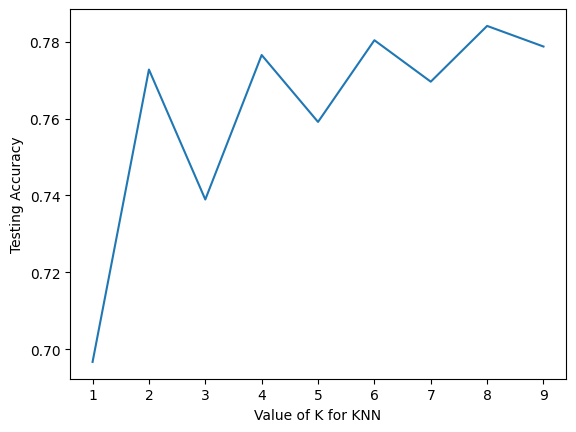

In [51]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

the best accuracy is still when K is equal to 8

In [52]:

knn = KNeighborsClassifier(n_neighbors=8, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [53]:
print("Accuracy on training set: {:.3f}".format(knn.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(x_test, y_test)))

Accuracy on training set: 0.807
Accuracy on test set: 0.784


<Li>Accuracy of training set is the same
<Li>Accuracy of test set is smaller than before feature selection

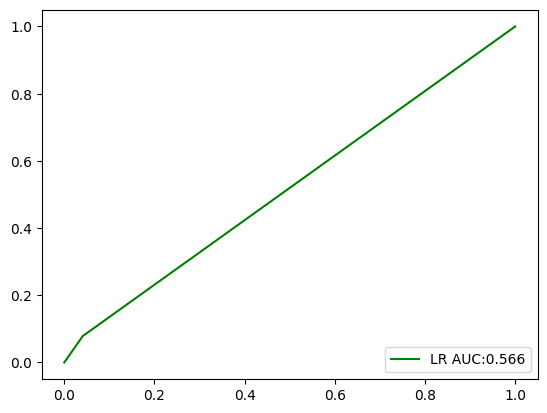

In [54]:
#Evaluation using auc score and roc curve
auc = roc_auc_score(y_pred, y_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

The Auc Score is higher than before feature selection

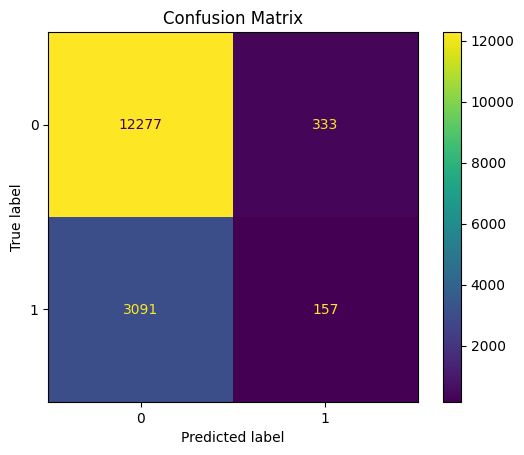

In [55]:
#Evaluation using Confusion Matrix 
plot_confusion_matrix(knn, x_test, y_test)  
plt.title('Confusion Matrix')
plt.show()

### This Confusion Matrix Has
<Li> Less true positives
<Li> More false positives
<Li> Less false negatives
<Li> More true negatives

In [56]:
train_sizes, train_scores, test_scores =\
learning_curve(knn, news, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.2,0.4,0.6,0.8,1])

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

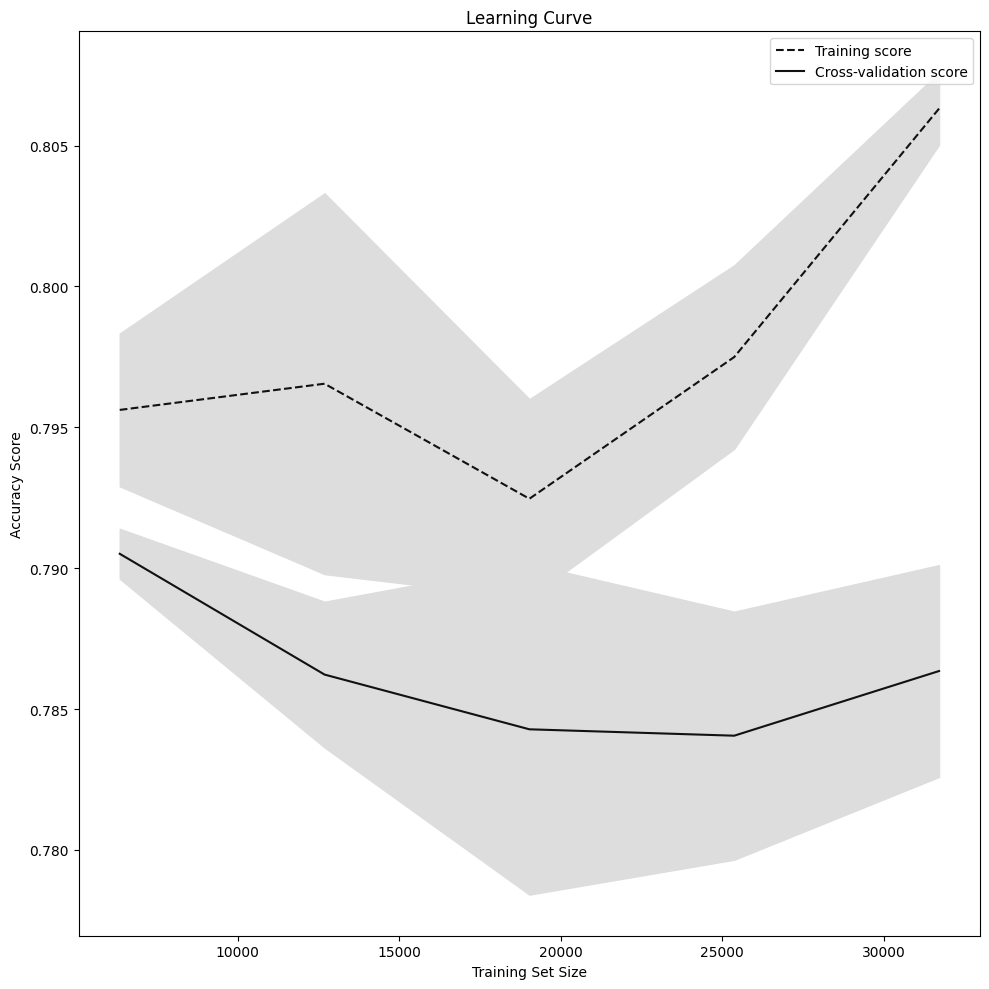

In [57]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

There is a slight unnoticeable change in the learning curve

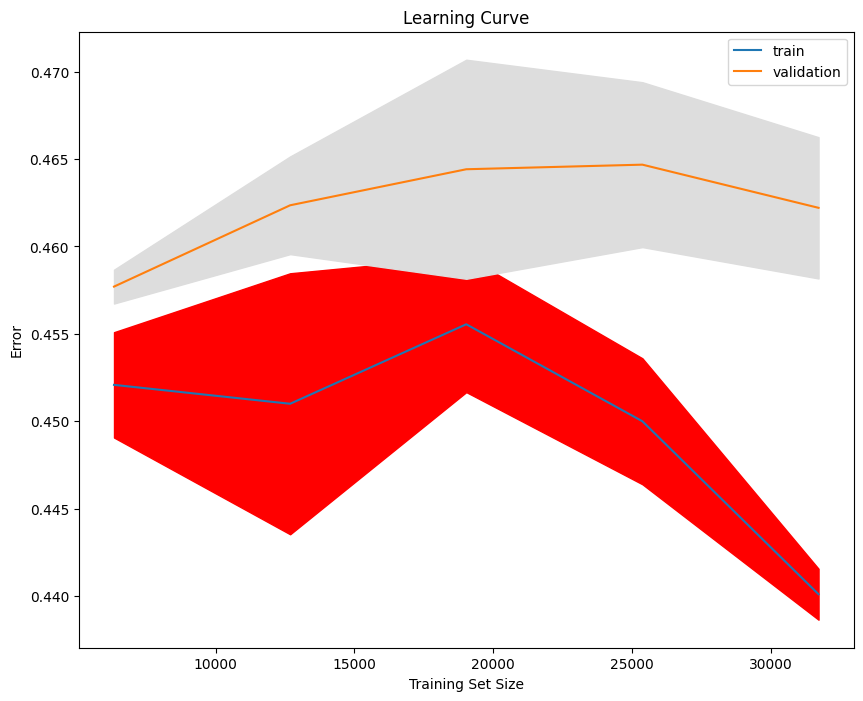

In [58]:
#ploting the learning curve which shows the error
train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn,
    X=news,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],

)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

There is a slight change in the learning curve which is unnoticeable

In [59]:
x_train,x_test,y_train,y_test=train_test_split(news,y,test_size=0.4, random_state=42)

In [60]:
#Multiclass Classification
from sklearn.tree import DecisionTreeClassifier
for i in range(1,8):
    treecf = DecisionTreeClassifier(max_depth=i,random_state=0)
    treecf.fit(x_train, y_train)
    y1_pred = treecf.predict(x_test)
    acc_train = treecf.score(x_train, y_train)
    acc_test = treecf.score(x_test, y_test)
    print("max_depth:{}".format(i))
    print("Training accuracy:{:.3f}".format(acc_train),"\nTesting accuracy:{}".format(acc_test))
    print(".....................")

max_depth:1
Training accuracy:0.797 
Testing accuracy:0.7951822424013116
.....................
max_depth:2
Training accuracy:0.797 
Testing accuracy:0.7951822424013116
.....................
max_depth:3
Training accuracy:0.797 
Testing accuracy:0.7951822424013116
.....................
max_depth:4
Training accuracy:0.797 
Testing accuracy:0.7949930634380123
.....................
max_depth:5
Training accuracy:0.798 
Testing accuracy:0.7940471686215159
.....................
max_depth:6
Training accuracy:0.799 
Testing accuracy:0.7938579896582166
.....................
max_depth:7
Training accuracy:0.801 
Testing accuracy:0.7899482910833648
.....................


According to the previous cell our accuracy is the highest when the max depth is set to 1 or 2 or 3

In [61]:
newstreecf = DecisionTreeClassifier(max_depth=1,random_state=0)
newstreecf.fit(x_train, y_train)
y1_pred = newstreecf.predict(x_test)

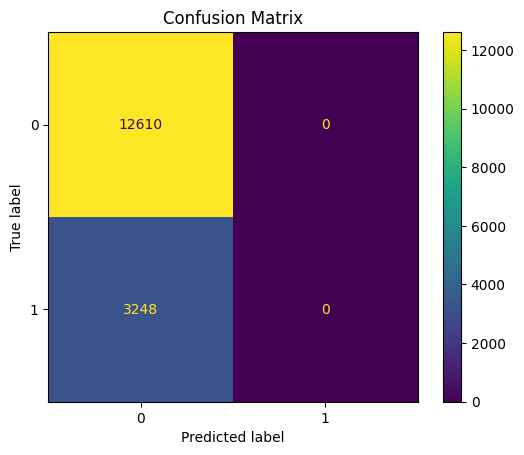

In [62]:
#Evaluation using Confusion Matrix 
plot_confusion_matrix(newstreecf, x_test, y_test)  
plt.title('Confusion Matrix')
plt.show()

### This Confusion Matrix Has
<Li> More true positives
<Li> Less false positives
<Li> More false negatives
<Li> Less true negatives

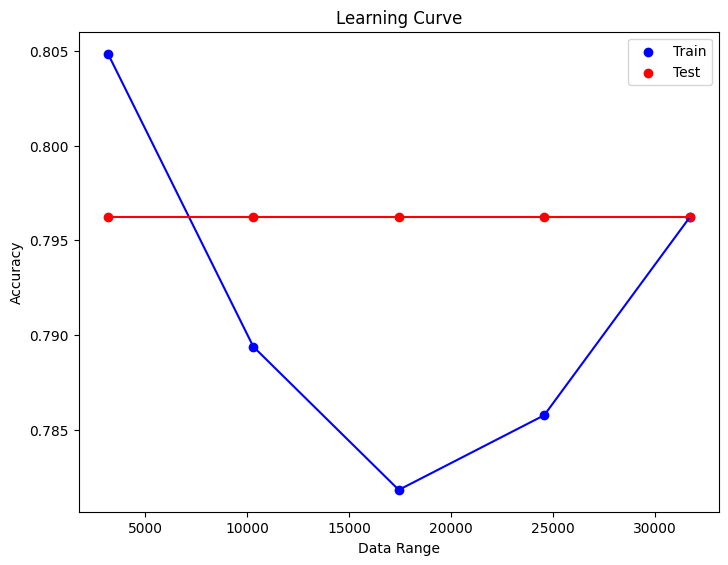

In [63]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(newstreecf, news, y,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(['Train','Test'],loc="best")
plt.show()

This learning curve is different as test set starts with a lower accuracy than before feature selection 

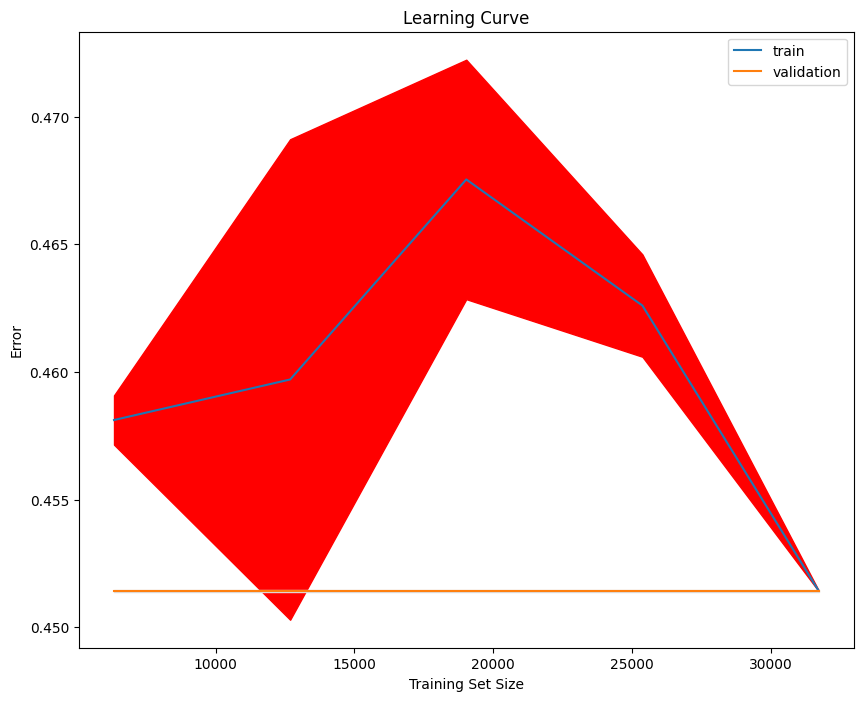

In [64]:
#ploting the learning curve which shows the error
train_sizes, train_scores, test_scores = learning_curve(
    estimator=newstreecf,
    X=news,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],

)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

The learning curve is different as the train is bigger 

In [65]:
x_train,x_test,y_train,y_test=train_test_split(news,y,test_size=0.4, random_state=42)

[0.7932904527683188, 0.7951822424013116, 0.7951822424013116, 0.7951822424013116, 0.7951822424013116]


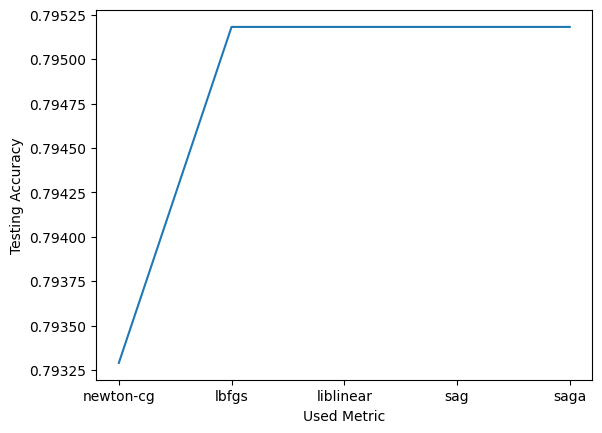

In [66]:
#Using Logestic Regression
Sols = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scores = []
for s in Sols:
    l = LogisticRegression(random_state=42,solver=s, max_iter=10000).fit(x_train, y_train)
    y_pred = l.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
  
print(scores)
plt.plot(Sols, scores)
plt.xlabel('Used Metric')
plt.ylabel('Testing Accuracy')
plt.show()


All of the Algorithims have the same accuracy except newton-cg which has the lowest of the four

In [67]:
lr = LogisticRegression(random_state=42,solver='sag', max_iter=10000).fit(x_train, y_train)
lr.score(x_test, y_test)

0.7951822424013116

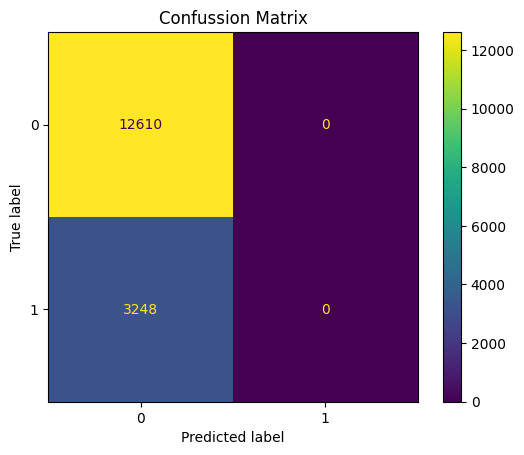

In [68]:
plot_confusion_matrix(lr, x_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

### This Confusion Matrix Has
<Li> More true positives
<Li> Less false positives
<Li> More false negatives
<Li> Less true negatives

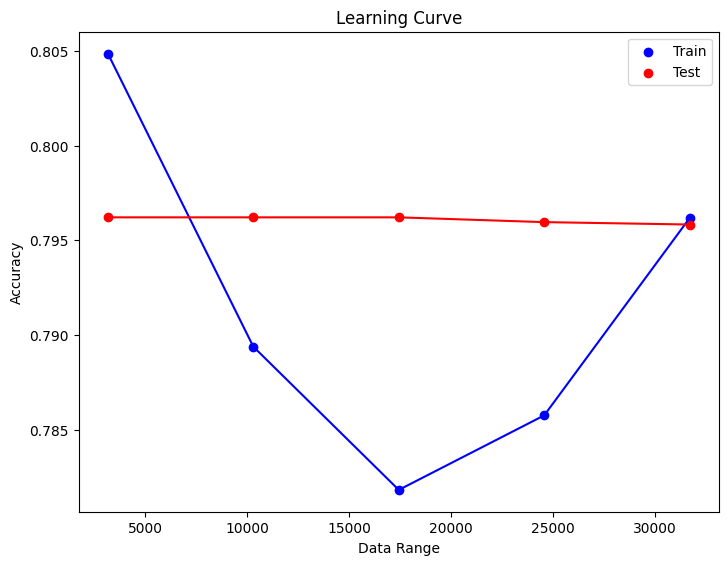

In [69]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(lr, news, y,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(['Train','Test'],loc="best")
plt.show()

The learning curve is different as the test set starts with a higher accuracy